In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/Lecture/情報理工学実験1/2024/

/content/drive/MyDrive/Lecture/情報理工学実験1/2024


# 課題 7.17

In [6]:
temp = np.random.randint(1, 6, size=20)
print(temp)

[2 1 4 3 4 1 3 4 5 3 1 1 3 5 4 2 4 1 5 4]


# 課題7.18

In [8]:
Xs = np.loadtxt('20.data', delimiter=' ', usecols=0)
Ys = np.loadtxt('20.data', delimiter=' ', usecols=1)

x_train = np.array(Xs)[temp!=5]
x_test = np.array(Xs)[temp==5]
y_train = np.array(Ys)[temp!=5]
y_test = np.array(Ys)[temp==5]

p = np.poly1d(np.polyfit(x_train, y_train, 3))
y_test_pred = p(x_test)

rms = math.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"rms erros is: {rms}")

rms erros is: 0.051692345122182924


# 課題 7.19

In [9]:
# use KFold, mean_squared_error

rms = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(Xs, Ys):
  x_train, x_test = Xs[train_index], Xs[test_index]
  y_train, y_test = Ys[train_index], Ys[test_index]
  f = np.polyfit(x_train, y_train, 5)
  p = np.poly1d(f)
  y_test_pred = p(x_test)
  rms.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
poly_rmse = np.mean(rms)

print(rms)
print(poly_rmse)

[0.14349439866594532, 0.09250866293990014, 0.14384085659702342, 0.09491904726772334, 0.1361917720666682]
0.12219094750745207


# 課題 7.20

[0.42447019250717444, 0.38204332639608934, 0.3001699359134735, 0.2601322524341451, 0.23254399144880655, 0.24555113493506073, 0.29852362345793454, 0.5863938152826461, 0.8289338584602839]


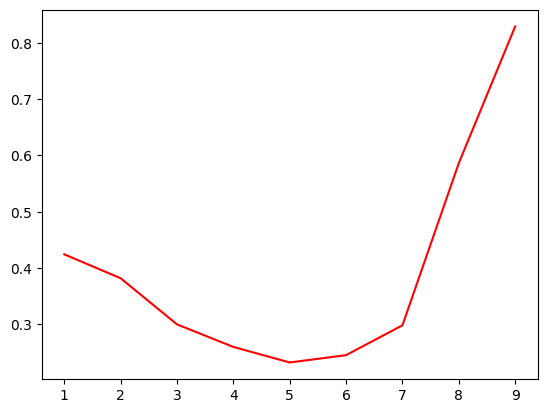

In [11]:
rms = []
RMSE_test = []
M = list(range(1,10))
kf = KFold(n_splits=5)

for num in M:
  for train_index, test_index in kf.split(Xs, Ys):
    x_train, x_test = Xs[train_index], Xs[test_index]
    y_train, y_test = Ys[train_index], Ys[test_index]

    f = np.polyfit(x_train, y_train, num)
    p = np.poly1d(f)
    y_test_pred = p(x_test)
    rms.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
  RMSE_test.append(np.mean(rms))

print(RMSE_test)
plt.plot(M, RMSE_test, color='red')

# 課題 7.21

degree = 1, RMSE = 0.42
degree = 2, RMSE = 0.38
degree = 3, RMSE = 0.30
degree = 4, RMSE = 0.26
degree = 5, RMSE = 0.23
degree = 6, RMSE = 0.25
degree = 7, RMSE = 0.30
degree = 8, RMSE = 0.59
degree = 9, RMSE = 0.83


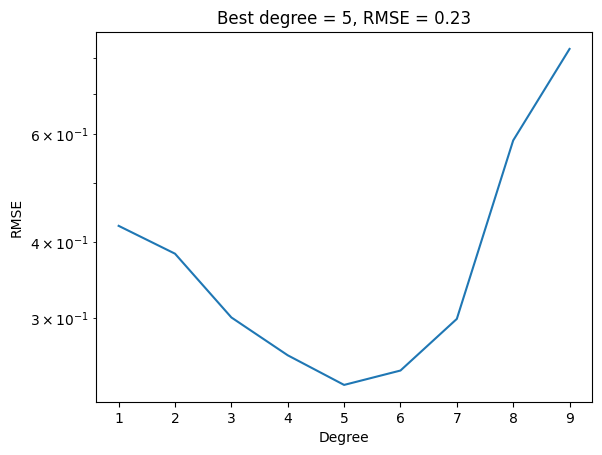

In [18]:
rms = []
rmses = []
RMSE_test = []
M = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

kf = KFold(n_splits=5)

for num in M:
  for train_index, test_index in kf.split(Xs, Ys):
    x_train, x_test = Xs[train_index], Xs[test_index]
    y_train, y_test = Ys[train_index], Ys[test_index]
    x_train = x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)

    poly = PolynomialFeatures(degree=num, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)

    # LinearRegression
    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y_train)

    x_test_poly = poly.fit_transform(x_test)
    y_test_pred = poly_reg.predict(x_test_poly)

    rms.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
  poly_rmse = np.mean(rms)
  rmses.append(poly_rmse)

  # 交叉検証
  if min_rmse > poly_rmse:
    min_rmse = poly_rmse
    min_deg = num
  print(f"degree = {num}, RMSE = {poly_rmse:.2f}")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(M, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.set_title(f'Best degree = {min_deg}, RMSE = {min_rmse:.2f}')
plt.show()

# 課題 7.21

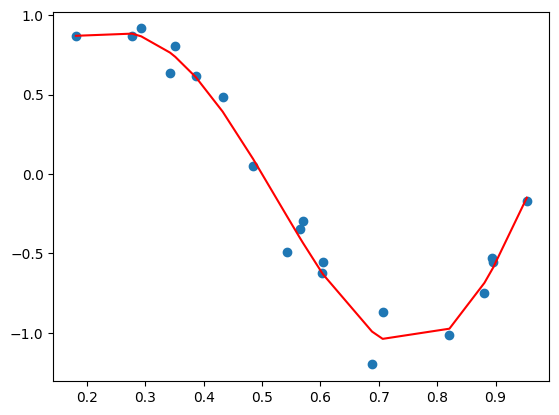

In [20]:
x = Xs.reshape(-1, 1)
poly = PolynomialFeatures(degree=5, include_bias=False)
x_train = poly.fit_transform(x)

# 多項式回帰
poly_reg = LinearRegression()
poly_reg.fit(x_train, Ys)

y_predict = poly_reg.predict(x_train)
plt.scatter(x, Ys)
sorted_indices = np.argsort(x[:,0], axis=0)
sorted_X2 = x[:,0][sorted_indices]
sorted_y2 = y_predict[sorted_indices]
plt.plot(sorted_X2, sorted_y2, color='red')
plt.show()